In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import shapely
from shapely.geometry import shape, mapping
import geopandas as gpd
from geopandas.tools import sjoin
import requests 
import json
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

from apyori import apriori

In [1]:


import sys
!{sys.executable} -m pip install mlxtend

In [2]:
# Reading in all the ballor initiative merges.

Ballot_14_1 = pd.read_csv("14_1_merge_sum_result.csv")
Ballot_14_1

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,544,790,25,1892,72,0,710,337,21.0,"1,068"
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,584,817,0,475,30,82,696,372,18.0,"1,086"
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,318,480,0,224,58,82,719,429,24.0,"1,172"
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,422,639,16,1147,98,0,846,417,41.0,"1,304"
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,320,492,0,312,0,0,821,440,22.0,"1,283"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,424,0,32,0,0,579,371,45.0,995
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,16,214,0,45,80,22,732,495,69.0,"1,296"
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,24,288,0,45,0,0,677,428,48.0,"1,153"
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,355,581,18,184,92,0,254,324,17.0,595


In [3]:
Ballot_14_2 = pd.read_csv("14_2_merge_sum_result.csv")
Ballot_14_2

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,544,790,25,1892,72,0,158,897,13.0,"1,068"
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,584,817,0,475,30,82,169,909,8.0,"1,086"
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,318,480,0,224,58,82,141,"1,012",19.0,"1,172"
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,422,639,16,1147,98,0,152,"1,136",16.0,"1,304"
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,320,492,0,312,0,0,162,"1,106",15.0,"1,283"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,424,0,32,0,0,127,845,23.0,995
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,16,214,0,45,80,22,161,"1,116",19.0,"1,296"
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,24,288,0,45,0,0,141,993,19.0,"1,153"
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,355,581,18,184,92,0,286,300,9.0,595


In [4]:
Ballot_14_3 = pd.read_csv("14_3_merge_sum_result.csv")
Ballot_14_3

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,544,790,25,1892,72,0,287,768,13.0,"1,068"
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,584,817,0,475,30,82,323,753,10.0,"1,086"
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,318,480,0,224,58,82,824,329,19.0,"1,172"
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,422,639,16,1147,98,0,366,914,24.0,"1,304"
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,320,492,0,312,0,0,335,925,23.0,"1,283"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,424,0,32,0,0,288,675,32.0,995
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,16,214,0,45,80,22,464,802,30.0,"1,296"
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,24,288,0,45,0,0,386,732,35.0,"1,153"
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,355,581,18,184,92,0,325,263,7.0,595


In [5]:
Ballot_14_4 = pd.read_csv("14_4_merge_sum_result.csv")
Ballot_14_4

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,544,790,25,1892,72,0,606,441,21.0,"1,068"
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,584,817,0,475,30,82,610,461,15.0,"1,086"
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,318,480,0,224,58,82,603,544,25.0,"1,172"
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,422,639,16,1147,98,0,720,558,26.0,"1,304"
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,320,492,0,312,0,0,683,565,35.0,"1,283"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,424,0,32,0,0,487,470,38.0,995
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,16,214,0,45,80,22,623,639,34.0,"1,296"
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,24,288,0,45,0,0,561,560,32.0,"1,153"
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,355,581,18,184,92,0,357,198,40.0,595


In [6]:
Ballot_16_2 = pd.read_csv("16_2_merge_sum_result.csv")
Ballot_16_2

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,544,790,25,1892,72,0,607,"1,048",54.0,"1,709"
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,584,817,0,475,30,82,529,"1,121",21.0,"1,671"
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,318,480,0,224,58,82,559,"1,135",32.0,"1,726"
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,422,639,16,1147,98,0,644,"1,230",45.0,"1,919"
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,320,492,0,312,0,0,634,"1,232",21.0,"1,887"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,424,0,32,0,0,497,968,39.0,"1,504"
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,16,214,0,45,80,22,663,"1,120",48,"1,831"
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,24,288,0,45,0,0,497,"1,032",48.0,"1,577"
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,355,581,18,184,92,0,234,513,16.0,763


In [7]:
Ballot_16_3 = pd.read_csv("16_3_merge_sum_result.csv")
Ballot_16_3

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,544,790,25,1892,72,0,"1,348",315,46.0,"1,709"
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,584,817,0,475,30,82,"1,291",355.0,25.0,"1,671"
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,318,480,0,224,58,82,"1,280",407,39.0,"1,726"
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,422,639,16,1147,98,0,"1,466",402,51.0,"1,919"
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,320,492,0,312,0,0,"1,462",399.0,26.0,"1,887"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,424,0,32,0,0,"1,172",280,52.0,"1,504"
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,16,214,0,45,80,22,"1,351",415,65.0,"1,831"
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,24,288,0,45,0,0,"1,161",364,52.0,"1,577"
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,355,581,18,184,92,0,518,231.0,14.0,763


In [15]:
Ballot_16_4 = pd.read_csv("16_4_merge_sum_result.csv")
Ballot_16_4

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,544,790,25,1892,72,0,952,722,35.0,"1,709"
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,584,817,0,475,30,82,901,751,19.0,"1,671"
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,318,480,0,224,58,82,892,809,25.0,"1,726"
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,422,639,16,1147,98,0,927,960,32.0,"1,919"
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,320,492,0,312,0,0,955,916,16.0,"1,887"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,424,0,32,0,0,803,664,37.0,"1,504"
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,16,214,0,45,80,22,724,"1,070",37.0,"1,831"
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,24,288,0,45,0,0,641,899,37.0,"1,577"
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,355,581,18,184,92,0,463,286,14.0,763


In [16]:
Ballot_18_1 = pd.read_csv("18_1_merge_sum_result.csv")
Ballot_18_1

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,544,790,25,1892,72,0,371,925,47.0,"1,343"
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,584,817,0,475,30,82,379.0,940,42.0,"1,361"
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,318,480,0,224,58,82,356,"1,041",49.0,"1,446"
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,422,639,16,1147,98,0,439,"1,170",57.0,"1,666"
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,320,492,0,312,0,0,420.0,"1,119",57.0,"1,596"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,424,0,32,0,0,233,950,36.0,"1,219"
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,16,214,0,45,80,22,339,"1,133",59.0,"1,531"
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,24,288,0,45,0,0,275,973,61.0,"1,309"
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,355,581,18,184,92,0,249,420,18.0,687


In [17]:
Ballot_18_2 = pd.read_csv("18_2_merge_sum_result.csv")
Ballot_18_2

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,544,790,25,1892,72,0,858,411,74.0,"1,343"
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,584,817,0,475,30,82,864,419,78.0,"1,361"
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,318,480,0,224,58,82,868,488,90.0,"1,446"
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,422,639,16,1147,98,0,"1,014",557,95.0,"1,666"
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,320,492,0,312,0,0,"1,013",509,74.0,"1,596"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,424,0,32,0,0,729,437,53.0,"1,219"
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,16,214,0,45,80,22,931,512,88.0,"1,531"
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,24,288,0,45,0,0,767,481,61.0,"1,309"
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,355,581,18,184,92,0,516,152,19.0,687


In [18]:
Ballot_20_1 = pd.read_csv("20_1_merge_sum_result.csv")
Ballot_20_1

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,544,790,25,1892,72,0,"1,309",477,74.0,"1,860"
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,584,817,0,475,30,82,"1,389",436,25.0,"1,850"
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,318,480,0,224,58,82,"1,372",435,46.0,"1,853"
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,422,639,16,1147,98,0,"1,466",554,68.0,"2,088"
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,320,492,0,312,0,0,"1,516",508,60.0,"2,084"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,424,0,32,0,0,"1,173",419,113.0,"1,705"
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,16,214,0,45,80,22,"1,374",402.0,136.0,"1,912"
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,24,288,0,45,0,0,"1,269",428,111.0,"1,808"
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,355,581,18,184,92,0,686,168,22.0,876


In [19]:
Ballot_20_2 = pd.read_csv("20_2_merge_sum_result.csv")
Ballot_20_2

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,544,790,25,1892,72,0,619,"1,146",95,"1,860"
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,584,817,0,475,30,82,593,"1,186",71,"1,850"
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,318,480,0,224,58,82,579,"1,193",81,"1,853"
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,422,639,16,1147,98,0,698,"1,296",94,"2,088"
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,320,492,0,312,0,0,678,"1,301",105,"2,084"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,424,0,32,0,0,586,968,151.0,"1,705"
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,16,214,0,45,80,22,621,"1,131",160.0,"1,912"
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,24,288,0,45,0,0,592,"1,077",139.0,"1,808"
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,355,581,18,184,92,0,405,436,35.0,876


In [8]:


Ballot_14_1.loc[Ballot_14_1['Yes'] > Ballot_14_1['No'] , 'Voted_for'] = 'Yes'  
Ballot_14_1.loc[Ballot_14_1['Yes'] < Ballot_14_1['No'] , 'Voted_for'] = 'No'

Ballot_14_1

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast,Voted_for
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,790,25,1892,72,0,710,337,21.0,"1,068",Yes
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,817,0,475,30,82,696,372,18.0,"1,086",Yes
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,480,0,224,58,82,719,429,24.0,"1,172",Yes
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,639,16,1147,98,0,846,417,41.0,"1,304",Yes
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,492,0,312,0,0,821,440,22.0,"1,283",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,424,0,32,0,0,579,371,45.0,995,Yes
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,214,0,45,80,22,732,495,69.0,"1,296",Yes
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,288,0,45,0,0,677,428,48.0,"1,153",Yes
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,581,18,184,92,0,254,324,17.0,595,No


In [26]:
# Encoding numbers for the yes and no votes.

Ballot_14_2.loc[Ballot_14_2['Yes'] > Ballot_14_2['No'] , 'Voted_for'] = 1  
Ballot_14_2.loc[Ballot_14_2['Yes'] < Ballot_14_2['No'] , 'Voted_for'] = 0

Ballot_14_3.loc[Ballot_14_3['Yes'] > Ballot_14_3['No'] , 'Voted_for'] = 1  
Ballot_14_3.loc[Ballot_14_3['Yes'] < Ballot_14_3['No'] , 'Voted_for'] = 0

Ballot_14_4.loc[Ballot_14_4['Yes'] > Ballot_14_4['No'] , 'Voted_for'] = 1  
Ballot_14_4.loc[Ballot_14_4['Yes'] < Ballot_14_4['No'] , 'Voted_for'] = 0

Ballot_16_2.loc[Ballot_16_2['Yes'] > Ballot_16_2['No'] , 'Voted_for'] = 1  
Ballot_16_2.loc[Ballot_16_2['Yes'] < Ballot_16_2['No'] , 'Voted_for'] = 0

Ballot_16_3.loc[Ballot_16_2['Yes'] > Ballot_16_3['No'] , 'Voted_for'] = 1  
Ballot_16_3.loc[Ballot_16_2['Yes'] < Ballot_16_3['No'] , 'Voted_for'] = 0

Ballot_16_3.loc[Ballot_16_2['Yes'] > Ballot_16_3['No'] , 'Voted_for'] = 1  
Ballot_16_3.loc[Ballot_16_2['Yes'] < Ballot_16_3['No'] , 'Voted_for'] = 0

Ballot_16_4.loc[Ballot_16_4['Yes'] > Ballot_16_4['No'] , 'Voted_for'] = 1  
Ballot_16_4.loc[Ballot_16_4['Yes'] < Ballot_16_4['No'] , 'Voted_for'] = 0

Ballot_18_1.loc[Ballot_18_1['Yes'] > Ballot_18_1['No'] , 'Voted_for'] = 1  
Ballot_18_1.loc[Ballot_18_1['Yes'] < Ballot_18_1['No'] , 'Voted_for'] = 0

Ballot_18_2.loc[Ballot_18_2['Yes'] > Ballot_18_2['No'] , 'Voted_for'] = 1  
Ballot_18_2.loc[Ballot_18_2['Yes'] < Ballot_18_2['No'] , 'Voted_for'] = 0

Ballot_20_1.loc[Ballot_20_1['Yes'] > Ballot_20_1['No'] , 'Voted_for'] = 1  
Ballot_20_1.loc[Ballot_20_1['Yes'] < Ballot_20_1['No'] , 'Voted_for'] = 0

Ballot_20_2.loc[Ballot_20_2['Yes'] > Ballot_20_2['No'] , 'Voted_for'] = 1  
Ballot_20_2.loc[Ballot_20_2['Yes'] < Ballot_20_2['No'] , 'Voted_for'] = 0





In [21]:
# Creating a column combining the locality, ward, and precinct - this is our geographic unit of analysis.

Ballot_14_1['Locality_WP'] = Ballot_14_1['Locality'] + '_' + Ballot_14_1['Ward'] + '_' + Ballot_14_1['Pct']
Ballot_14_2['Locality_WP'] = Ballot_14_2['Locality'] + '_' + Ballot_14_2['Ward'] + '_' + Ballot_14_2['Pct']
Ballot_14_3['Locality_WP'] = Ballot_14_3['Locality'] + '_' + Ballot_14_3['Ward'] + '_' + Ballot_14_3['Pct']
Ballot_14_4['Locality_WP'] = Ballot_14_4['Locality'] + '_' + Ballot_14_4['Ward'] + '_' + Ballot_14_4['Pct']
Ballot_16_2['Locality_WP'] = Ballot_16_2['Locality'] + '_' + Ballot_16_2['Ward'] + '_' + Ballot_16_2['Pct']
Ballot_16_3['Locality_WP'] = Ballot_16_3['Locality'] + '_' + Ballot_16_3['Ward'] + '_' + Ballot_16_3['Pct']
Ballot_16_4['Locality_WP'] = Ballot_16_4['Locality'] + '_' + Ballot_16_4['Ward'] + '_' + Ballot_16_4['Pct']
Ballot_18_1['Locality_WP'] = Ballot_18_1['Locality'] + '_' + Ballot_18_1['Ward'] + '_' + Ballot_18_1['Pct']
Ballot_18_2['Locality_WP'] = Ballot_18_2['Locality'] + '_' + Ballot_18_2['Ward'] + '_' + Ballot_18_2['Pct']
Ballot_20_1['Locality_WP'] = Ballot_20_1['Locality'] + '_' + Ballot_20_1['Ward'] + '_' + Ballot_20_1['Pct']
Ballot_20_2['Locality_WP'] = Ballot_20_2['Locality'] + '_' + Ballot_20_2['Ward'] + '_' + Ballot_20_2['Pct']




Ballot_20_2


,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast,Voted_for,Locality_WP
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,25,1892,72,0,619,"1,146",95,"1,860",Yes,ABINGTON_-_1
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,0,475,30,82,593,"1,186",71,"1,850",Yes,ABINGTON_-_2
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,0,224,58,82,579,"1,193",81,"1,853",Yes,ABINGTON_-_3
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,16,1147,98,0,698,"1,296",94,"2,088",Yes,ABINGTON_-_4
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,0,312,0,0,678,"1,301",105,"2,084",Yes,ABINGTON_-_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,32,0,0,586,968,151.0,"1,705",No,WOBURN_6_2
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,0,45,80,22,621,"1,131",160.0,"1,912",Yes,WOBURN_7_1
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,0,45,0,0,592,"1,077",139.0,"1,808",Yes,WOBURN_7_2
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,18,184,92,0,405,436,35.0,876,No,WORTHINGTON_-_1


In [27]:
# Creating lists of ward precincts that voted yes and no on each question.

Ballot_14_1_Yes = list(Ballot_14_1[Ballot_14_1['Voted_for'] == 1]['Locality_WP'].unique())
Ballot_14_1_No = list(Ballot_14_1[Ballot_14_1['Voted_for'] == 0]['Locality_WP'].unique())

Ballot_14_2_Yes = list(Ballot_14_2[Ballot_14_2['Voted_for'] == 1]['Locality_WP'].unique())
Ballot_14_2_No = list(Ballot_14_2[Ballot_14_2['Voted_for'] == 0]['Locality_WP'].unique())

Ballot_14_3_Yes = list(Ballot_14_3[Ballot_14_3['Voted_for'] == 1]['Locality_WP'].unique())
Ballot_14_3_No = list(Ballot_14_3[Ballot_14_3['Voted_for'] == 0]['Locality_WP'].unique())

Ballot_14_4_Yes = list(Ballot_14_4[Ballot_14_4['Voted_for'] == 1]['Locality_WP'].unique())
Ballot_14_4_No = list(Ballot_14_4[Ballot_14_4['Voted_for'] == 0]['Locality_WP'].unique())

Ballot_16_2_Yes = list(Ballot_16_2[Ballot_16_2['Voted_for'] == 1]['Locality_WP'].unique())
Ballot_16_2_No = list(Ballot_16_2[Ballot_16_2['Voted_for'] == 0]['Locality_WP'].unique())

Ballot_16_3_Yes = list(Ballot_16_3[Ballot_16_3['Voted_for'] == 1]['Locality_WP'].unique())
Ballot_16_3_No = list(Ballot_16_3[Ballot_16_3['Voted_for'] == 0]['Locality_WP'].unique())

Ballot_16_4_Yes = list(Ballot_16_4[Ballot_16_4['Voted_for'] == 1]['Locality_WP'].unique())
Ballot_16_4_No = list(Ballot_16_4[Ballot_16_4['Voted_for'] == 0]['Locality_WP'].unique())

Ballot_18_1_Yes = list(Ballot_18_1[Ballot_18_1['Voted_for'] == 1]['Locality_WP'].unique())
Ballot_18_1_No = list(Ballot_18_1[Ballot_18_1['Voted_for'] == 0]['Locality_WP'].unique())

Ballot_18_2_Yes = list(Ballot_18_2[Ballot_18_2['Voted_for'] == 1]['Locality_WP'].unique())
Ballot_18_2_No = list(Ballot_18_2[Ballot_18_2['Voted_for'] == 0]['Locality_WP'].unique())

Ballot_20_1_Yes = list(Ballot_20_1[Ballot_20_1['Voted_for'] == 1]['Locality_WP'].unique())
Ballot_20_1_No = list(Ballot_20_1[Ballot_20_1['Voted_for'] == 0]['Locality_WP'].unique())

Ballot_20_2_Yes = list(Ballot_20_2[Ballot_20_2['Voted_for'] == 1]['Locality_WP'].unique())
Ballot_20_2_No = list(Ballot_20_2[Ballot_20_2['Voted_for'] == 0]['Locality_WP'].unique())


Ballot_20_2





,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast,Voted_for,Locality_WP
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,25,1892,72,0,619,"1,146",95,"1,860",1,ABINGTON_-_1
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,0,475,30,82,593,"1,186",71,"1,850",1,ABINGTON_-_2
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,0,224,58,82,579,"1,193",81,"1,853",1,ABINGTON_-_3
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,16,1147,98,0,698,"1,296",94,"2,088",1,ABINGTON_-_4
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,0,312,0,0,678,"1,301",105,"2,084",1,ABINGTON_-_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,32,0,0,586,968,151.0,"1,705",0,WOBURN_6_2
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,0,45,80,22,621,"1,131",160.0,"1,912",1,WOBURN_7_1
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,0,45,0,0,592,"1,077",139.0,"1,808",1,WOBURN_7_2
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,18,184,92,0,405,436,35.0,876,0,WORTHINGTON_-_1


In [47]:
# List of all the voting ward precincts by year.
Apriori_List = []

Apriori_List.extend([Ballot_14_1_Yes, Ballot_14_1_No, Ballot_14_2_Yes, Ballot_14_2_No, Ballot_14_3_Yes, 
                   Ballot_14_3_No, Ballot_14_4_Yes, Ballot_14_4_No, Ballot_16_2_Yes, Ballot_16_2_No, 
                   Ballot_16_3_Yes, Ballot_16_3_No, Ballot_16_4_Yes, Ballot_16_4_No, 
                    Ballot_18_1_Yes, Ballot_18_1_No, Ballot_18_2_Yes, Ballot_18_2_No, Ballot_20_1_Yes,
                    Ballot_20_1_No, Ballot_20_2_Yes, Ballot_20_2_No])

Apriori_List

[[],
 [],
 ['ABINGTON_-_3',
  'ABINGTON_-_4',
  'ABINGTON_-_5',
  'ADAMS_-_1',
  'ADAMS_-_3',
  'ADAMS_-_4',
  'AGAWAM_-_2',
  'AGAWAM_-_5',
  'AMHERST_-_1',
  'AMHERST_-_10',
  'AMHERST_-_2',
  'AMHERST_-_3',
  'AMHERST_-_4',
  'AMHERST_-_5',
  'AMHERST_-_6',
  'AMHERST_-_7',
  'AMHERST_-_8',
  'AMHERST_-_9',
  'ANDOVER_-_2',
  'ANDOVER_-_3',
  'ANDOVER_-_4',
  'ANDOVER_-_5',
  'ANDOVER_-_6',
  'ANDOVER_-_8',
  'ANDOVER_-_9',
  'AQUINNAH_-_1',
  'ARLINGTON_-_10',
  'ARLINGTON_-_3',
  'ARLINGTON_-_4',
  'ARLINGTON_-_6',
  'ARLINGTON_-_8',
  'ASHBURNHAM_-_1',
  'ASHBY_-_1',
  'ASHFIELD_-_1',
  'AUBURN_-_1',
  'AUBURN_-_2',
  'AUBURN_-_3',
  'AUBURN_-_4',
  'AVON_-_1',
  'AYER_-_2',
  'BECKET_-_1',
  'BEDFORD_-_1',
  'BELCHERTOWN_-_C',
  'BELLINGHAM_-_2',
  'BELLINGHAM_-_3',
  'BELMONT_-_1',
  'BELMONT_-_6',
  'BERLIN_-_1',
  'BEVERLY_1_2',
  'BEVERLY_4_2',
  'BEVERLY_5_1',
  'BEVERLY_5_2',
  'BEVERLY_6_1',
  'BEVERLY_6_2',
  'BILLERICA_-_1',
  'BILLERICA_-_10',
  'BILLERICA_-_11',
  'BI

In [49]:
# Creating a co-occurence matrix from the list of ward precincts that voted every year together.

te = TransactionEncoder()
te_ary = te.fit(Apriori_List).transform(Apriori_List)
df_Co_occurence_matrix = pd.DataFrame(te_ary, columns=te.columns_)
df_Co_occurence_matrix

,ABINGTON_-_1,ABINGTON_-_2,ABINGTON_-_3,ABINGTON_-_4,ABINGTON_-_5,ACTON_-_1,ACTON_-_2,ACTON_-_3,ACTON_-_4,ACTON_-_5,...,WOBURN_4_1,WOBURN_4_2,WOBURN_5_1,WOBURN_5_2,WOBURN_6_1,WOBURN_6_2,WOBURN_7_1,WOBURN_7_2,WORTHINGTON_-_1,WRENTHAM_-_1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False,...,False,False,False,True,True,False,True,False,False,True
3,True,True,False,False,False,True,True,True,True,True,...,True,True,True,False,False,True,False,True,True,False
4,False,False,True,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,True,True
5,True,True,False,True,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,False,False
6,True,True,True,True,True,True,True,False,False,True,...,False,True,True,True,True,True,False,True,True,True
7,False,False,False,False,False,False,False,True,True,False,...,True,False,False,False,False,False,True,False,False,False
8,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,False,False,True,True,False,True
9,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,True,False,False,True,False


In [50]:
from kmodes.kmodes import KModes

# Running k-modes clustering with 5 clusters.

km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_Co_occurence_matrix)
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_Co_occurence_matrix.columns
clusterCentroidsDf

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 5408.0
Run 1, iteration: 2/100, moves: 0, cost: 5408.0


,ABINGTON_-_1,ABINGTON_-_2,ABINGTON_-_3,ABINGTON_-_4,ABINGTON_-_5,ACTON_-_1,ACTON_-_2,ACTON_-_3,ACTON_-_4,ACTON_-_5,...,WOBURN_4_1,WOBURN_4_2,WOBURN_5_1,WOBURN_5_2,WOBURN_6_1,WOBURN_6_2,WOBURN_7_1,WOBURN_7_2,WORTHINGTON_-_1,WRENTHAM_-_1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,False,True
2,True,True,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,True,False
3,False,False,True,True,True,True,True,True,True,True,...,True,False,False,True,False,False,True,False,False,True
4,False,False,False,False,False,True,False,True,True,True,...,False,True,True,False,True,True,False,False,True,False


In [52]:
cost = []

# Calculating cost for each clustering size.

for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_Co_occurence_matrix)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14282.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7416.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 5978.0
Run 1, iteration: 2/100, moves: 0, cost: 5978.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 5408.0
Run 1, iteration: 2/100, moves: 0, cost: 5408.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 4811.0
Run 1, iteration: 2/100, moves: 0, cost: 4811.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, 

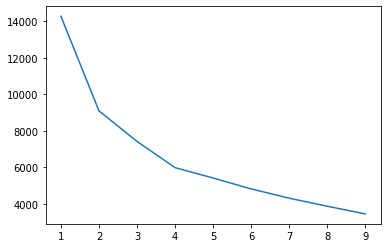

In [55]:
# Plotting the sum of squares graph to determine the optimal number of clusters.

y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [64]:
# After finding that n=4 is the inflection point on the elbow method, we re-run using n=4.

km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_Co_occurence_matrix)
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_Co_occurence_matrix.columns
clusterCentroidsDf

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 5978.0
Run 1, iteration: 2/100, moves: 0, cost: 5978.0


,ABINGTON_-_1,ABINGTON_-_2,ABINGTON_-_3,ABINGTON_-_4,ABINGTON_-_5,ACTON_-_1,ACTON_-_2,ACTON_-_3,ACTON_-_4,ACTON_-_5,...,WOBURN_4_1,WOBURN_4_2,WOBURN_5_1,WOBURN_5_2,WOBURN_6_1,WOBURN_6_2,WOBURN_7_1,WOBURN_7_2,WORTHINGTON_-_1,WRENTHAM_-_1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,False,True
2,True,True,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,True,False
3,False,False,True,True,True,True,True,True,True,True,...,True,False,False,True,False,False,True,False,False,True


In [65]:
Cluster_1 = []
Cluster_2 = []
Cluster_3 = []
Cluster_4 = []

# Writing each cluster to a list.

for columns in clusterCentroidsDf.columns:
    if clusterCentroidsDf[columns].iloc[0] == True:
        Cluster_1.append(columns)
        
    elif clusterCentroidsDf[columns].iloc[1] == True:
        Cluster_2.append(columns)
        
    elif clusterCentroidsDf[columns].iloc[2] == True:
        Cluster_3.append(columns)
        
    elif clusterCentroidsDf[columns].iloc[3] == True:
        Cluster_4.append(columns)
        

        
Cluster_4
        

['ACTON_-_1',
 'ACTON_-_3',
 'ACTON_-_4',
 'ACTON_-_5',
 'ACTON_-_6',
 'ALFORD_-_1',
 'AMHERST_-_1',
 'AMHERST_-_10',
 'AMHERST_-_2',
 'AMHERST_-_3',
 'AMHERST_-_6',
 'AMHERST_-_7',
 'ANDOVER_-_2',
 'ANDOVER_-_3',
 'ANDOVER_-_4',
 'ANDOVER_-_5',
 'ANDOVER_-_9',
 'AQUINNAH_-_1',
 'ARLINGTON_-_8',
 'ASHBURNHAM_-_1',
 'BEDFORD_-_4',
 'BELMONT_-_1',
 'BELMONT_-_2',
 'BELMONT_-_3',
 'BELMONT_-_5',
 'BELMONT_-_6',
 'BELMONT_-_7',
 'BELMONT_-_8',
 'BEVERLY_6_1',
 'BILLERICA_-_5',
 'BOLTON_-_1',
 'BOSTON_10_9',
 'BOSTON_11_8',
 'BOSTON_19_4',
 'BOSTON_19_6',
 'BOSTON_19_7',
 'BOXBOROUGH_-_1',
 'BOYLSTON_-_1',
 'BRIDGEWATER_-_3',
 'BROOKLINE_-_1',
 'BROOKLINE_-_10',
 'BROOKLINE_-_11',
 'BROOKLINE_-_12',
 'BROOKLINE_-_13',
 'BROOKLINE_-_14',
 'BROOKLINE_-_15',
 'BROOKLINE_-_16',
 'BROOKLINE_-_3',
 'BROOKLINE_-_4',
 'BROOKLINE_-_5',
 'BROOKLINE_-_6',
 'BROOKLINE_-_7',
 'BROOKLINE_-_8',
 'BROOKLINE_-_9',
 'BURLINGTON_-_1',
 'CAMBRIDGE_10_2',
 'CAMBRIDGE_10_3',
 'CAMBRIDGE_6_3',
 'CAMBRIDGE_7_1',
 

In [133]:
Cluster_1_df = pd.DataFrame(Cluster_1)
Cluster_2_df = pd.DataFrame(Cluster_2)
Cluster_3_df = pd.DataFrame(Cluster_3)
Cluster_4_df = pd.DataFrame(Cluster_4)

In [134]:
Cluster_1_df.to_csv("Cluster_1.csv", encoding = "utf-8")
Cluster_2_df.to_csv("Cluster_2.csv", encoding = "utf-8")
Cluster_3_df.to_csv("Cluster_3.csv", encoding = "utf-8")
Cluster_4_df.to_csv("Cluster_4.csv", encoding = "utf-8")

# Writing each cluster to its own dataframe.

In [66]:
Ballot_20_2.columns

Index(['Unnamed: 0', 'Locality', 'Ward', 'Pct',
       'Total:Population of one race:White',
       'Total:Population of one race:Black or African American',
       'Total:Population of one race:American Indian and Alaska Native',
       'Total:Population of one race:Asian',
       'Total:Population of one race:Native Hawaiian and Other Pacific Islander',
       'Total:Population of one race:Some other race',
       'Total:Population of two or more races:',
       'Total:Population of two or more races:Two races including Some other race',
       'Total:Population of two or more races:Two races excluding Some other race, and three or more races',
       'Total:Population of two or more races:Population of two races:',
       'Total:Population of two or more races:Population of two races:White; Black or African American',
       'Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native',
       'Total:Population of two or more races:Populati

In [68]:
WP_Demographics = Ballot_20_2[['Locality', 'Ward', 'Pct', 'Locality_WP',
       'Total:Population of one race:White',
       'Total:Population of one race:Black or African American',
       'Total:Population of one race:American Indian and Alaska Native',
       'Total:Population of one race:Asian',
       'Total:Population of one race:Native Hawaiian and Other Pacific Islander',
       'Total:Population of one race:Some other race',
       'Total:Population of two or more races:',
       'Total:Population of two or more races:Two races including Some other race',
       'Total:Population of two or more races:Two races excluding Some other race, and three or more races',
       'Total:Population of two or more races:Population of two races:',
       'Total:Population of two or more races:Population of two races:White; Black or African American',
       'Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native',
       'Total:Population of two or more races:Population of two races:White; Asian',
       'Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native',
       'Total:Population of two or more races:Population of two races:All other two race combinations',
       'Total:Population of two or more races:Population of three races',
       'Total:Population of two or more races:Population of four or more races']]

WP_Demographics

# Extracting just demographics of the ballot initiative merge. Note that this uses census data that we collected,
# the ballot initiative merges may have to be re completed using the proportional merge method from 
# "MA Ward Precinct and Census Block Group merge"


,Locality,Ward,Pct,Locality_WP,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Two races including Some other race,"Total:Population of two or more races:Two races excluding Some other race, and three or more races",Total:Population of two or more races:Population of two races:,Total:Population of two or more races:Population of two races:White; Black or African American,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races
0,ABINGTON,-,1,ABINGTON_-_1,130066,12649,386,3870,0,4668,...,1733,3389,5050,1799,544,790,25,1892,72,0
1,ABINGTON,-,2,ABINGTON_-_2,158272,2252,0,3545,8,2208,...,475,3141,3504,1628,584,817,0,475,30,82
2,ABINGTON,-,3,ABINGTON_-_3,104670,2394,63,3425,8,1812,...,176,1867,1903,881,318,480,0,224,58,82
3,ABINGTON,-,4,ABINGTON_-_4,106625,9663,113,3411,0,3707,...,1072,2296,3270,1046,422,639,16,1147,98,0
4,ABINGTON,-,5,ABINGTON_-_5,77872,1298,0,2088,0,1180,...,312,1788,2100,976,320,492,0,312,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,WOBURN,6,2,WOBURN_6_2,13078,1008,0,3996,0,156,...,0,630,630,174,0,424,0,32,0,0
1425,WOBURN,7,1,WOBURN_7_1,17781,752,0,1477,0,310,...,45,356,299,24,16,214,0,45,80,22
1426,WOBURN,7,2,WOBURN_7_2,19887,597,0,1986,0,420,...,45,348,393,36,24,288,0,45,0,0
1427,WORTHINGTON,-,1,WORTHINGTON_-_1,79542,1617,118,2445,0,308,...,126,1546,1580,442,355,581,18,184,92,0


In [131]:
WP_Demographics.to_csv("MA_WP_Demographics.csv", encoding = "utf-8")

In [106]:
column_list = ['Total:Population of one race:White',
       'Total:Population of one race:Black or African American',
       'Total:Population of one race:American Indian and Alaska Native',
       'Total:Population of one race:Asian',
       'Total:Population of one race:Native Hawaiian and Other Pacific Islander',
       'Total:Population of one race:Some other race']

Cluster_1_Demographics = WP_Demographics[WP_Demographics['Locality_WP'].isin(Cluster_1)]
Cluster_1_Demographics['Total Population'] = Cluster_1_Demographics[column_list].sum(axis=1)


White_dem = []
Black_dem = []
American_Indian_dem = []
Asian_dem = []
Native_Hawaiian_AAPI_dem = []
Other_dem = []

#for columns in column_list:
    
    
Cluster_1_Demographics


<ipython-input-106-8149eea4fd40>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_1_Demographics['Total Population'] = Cluster_1_Demographics[column_list].sum(axis=1)


,Locality,Ward,Pct,Locality_WP,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,"Total:Population of two or more races:Two races excluding Some other race, and three or more races",Total:Population of two or more races:Population of two races:,Total:Population of two or more races:Population of two races:White; Black or African American,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Total Population
38,AMHERST,-,8,AMHERST_-_8,31063,2742,42,3487,18,903,...,2033,2114,1213,104,456,17,324,78,128,38255
45,ANDOVER,-,6,ANDOVER_-_6,15911,358,6,776,0,39,...,428,412,204,110,92,0,6,17,0,17090
47,ANDOVER,-,8,ANDOVER_-_8,54862,1421,11,6535,10,557,...,937,1044,156,119,481,0,288,137,0,63396
157,BOSTON,11,9,BOSTON_11_9,10860,708,20,588,0,218,...,600,540,122,0,390,0,28,88,0,12394
178,BOSTON,17,11,BOSTON_17_11,13843,17749,21,3599,0,2014,...,1523,1465,641,236,92,39,457,515,0,37226
186,BOSTON,17,7,BOSTON_17_7,8541,25966,28,2496,0,1706,...,1781,1996,785,251,42,345,573,358,0,38737
219,BOSTON,19,8,BOSTON_19_8,5430,354,10,294,0,109,...,300,270,61,0,195,0,14,44,0,6197
220,BOSTON,19,9,BOSTON_19_9,10860,708,20,588,0,218,...,600,540,122,0,390,0,28,88,0,12394
243,BOSTON,3,8,BOSTON_3_8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244,BOSTON,4,10,BOSTON_4_10,71,28,0,0,0,0,...,0,0,0,0,0,0,0,0,0,99


In [107]:
df_sum = Cluster_1_Demographics.sum(numeric_only = True)
Cluster_demographics = df_sum.to_frame().T
Cluster_demographics['Cluster Number'] = 1
Cluster_demographics

# Calculating cluster demographics

,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,Total:Population of two or more races:,Total:Population of two or more races:Two races including Some other race,"Total:Population of two or more races:Two races excluding Some other race, and three or more races",Total:Population of two or more races:Population of two races:,Total:Population of two or more races:Population of two races:White; Black or African American,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Total Population,Cluster Number
0,1752615,94087,2321,77913,550,28770,59304,7438,51866,55510,26482,5135,13573,1392,8928,3372,422,1956256,1


In [108]:
Cluster_2_Demographics = WP_Demographics[WP_Demographics['Locality_WP'].isin(Cluster_2)]
Cluster_2_Demographics['Total Population'] = Cluster_2_Demographics[column_list].sum(axis=1)
Cluster_2_Demographics


<ipython-input-108-c26e188efb9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_2_Demographics['Total Population'] = Cluster_2_Demographics[column_list].sum(axis=1)


,Locality,Ward,Pct,Locality_WP,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,"Total:Population of two or more races:Two races excluding Some other race, and three or more races",Total:Population of two or more races:Population of two races:,Total:Population of two or more races:Population of two races:White; Black or African American,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Total Population
0,ABINGTON,-,1,ABINGTON_-_1,130066,12649,386,3870,0,4668,...,3389,5050,1799,544,790,25,1892,72,0,151639
1,ABINGTON,-,2,ABINGTON_-_2,158272,2252,0,3545,8,2208,...,3141,3504,1628,584,817,0,475,30,82,166285
2,ABINGTON,-,3,ABINGTON_-_3,104670,2394,63,3425,8,1812,...,1867,1903,881,318,480,0,224,58,82,112372
3,ABINGTON,-,4,ABINGTON_-_4,106625,9663,113,3411,0,3707,...,2296,3270,1046,422,639,16,1147,98,0,123519
4,ABINGTON,-,5,ABINGTON_-_5,77872,1298,0,2088,0,1180,...,1788,2100,976,320,492,0,312,0,0,82438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,WOBURN,6,1,WOBURN_6_1,13078,1008,0,3996,0,156,...,630,630,174,0,424,0,32,0,0,18238
1424,WOBURN,6,2,WOBURN_6_2,13078,1008,0,3996,0,156,...,630,630,174,0,424,0,32,0,0,18238
1425,WOBURN,7,1,WOBURN_7_1,17781,752,0,1477,0,310,...,356,299,24,16,214,0,45,80,22,20320
1426,WOBURN,7,2,WOBURN_7_2,19887,597,0,1986,0,420,...,348,393,36,24,288,0,45,0,0,22890


In [109]:
df_sum_2 = Cluster_2_Demographics.sum(numeric_only = True)
Cluster_demographics.loc[1] = df_sum_2
Cluster_demographics['Cluster Number'].iloc[1] = 2
Cluster_demographics


,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,Total:Population of two or more races:,Total:Population of two or more races:Two races including Some other race,"Total:Population of two or more races:Two races excluding Some other race, and three or more races",Total:Population of two or more races:Population of two races:,Total:Population of two or more races:Population of two races:White; Black or African American,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Total Population,Cluster Number
0,1752615.0,94087.0,2321.0,77913.0,550.0,28770.0,59304.0,7438.0,51866.0,55510.0,26482.0,5135.0,13573.0,1392.0,8928.0,3372.0,422.0,1956256.0,1.0
1,47617579.0,4095902.0,99580.0,3247546.0,16777.0,2178213.0,1652178.0,264847.0,1387331.0,1548893.0,655947.0,151713.0,376711.0,38602.0,325920.0,94280.0,9005.0,57255597.0,2.0


In [110]:
Cluster_3_Demographics = WP_Demographics[WP_Demographics['Locality_WP'].isin(Cluster_3)]
Cluster_3_Demographics['Total Population'] = Cluster_3_Demographics[column_list].sum(axis=1)
Cluster_3_Demographics


<ipython-input-110-1118c68f9290>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_3_Demographics['Total Population'] = Cluster_3_Demographics[column_list].sum(axis=1)


,Locality,Ward,Pct,Locality_WP,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,"Total:Population of two or more races:Two races excluding Some other race, and three or more races",Total:Population of two or more races:Population of two races:,Total:Population of two or more races:Population of two races:White; Black or African American,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Total Population
34,AMHERST,-,4,AMHERST_-_4,35268,1404,225,4321,39,298,...,760,847,227,97,227,81,215,43,0,41555
72,ASHFIELD,-,1,ASHFIELD_-_1,6304,12,30,50,0,26,...,70,66,12,16,26,0,12,16,0,6422
89,BARRE,-,1,BARRE_-_1,34289,535,2,483,94,31,...,564,665,105,108,210,0,242,50,87,35434
91,BECKET,-,1,BECKET_-_1,181546,4380,357,6151,0,1420,...,3767,3884,1091,736,1531,36,490,197,0,193854
140,BOSTON,1,10,BOSTON_1_10,329,7,0,29,28,0,...,20,20,6,0,9,0,5,0,0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,WALTHAM,4,2,WALTHAM_4_2,24271,1008,96,2484,0,661,...,525,709,241,17,229,0,222,2,0,28520
1291,WARWICK,-,1,WARWICK_-_1,3129,16,0,10,0,0,...,27,61,0,7,20,0,34,0,0,3155
1300,WATERTOWN,-,5,WATERTOWN_-_5,32839,503,0,3685,0,971,...,1237,777,232,60,485,0,0,0,460,37998
1406,WINDSOR,-,1,WINDSOR_-_1,22253,118,69,181,4,48,...,240,231,72,57,44,3,55,64,0,22673


In [111]:
df_sum_3 = Cluster_3_Demographics.sum(numeric_only = True)
Cluster_demographics.loc[2] = df_sum_3
Cluster_demographics['Cluster Number'].iloc[2] = 3
Cluster_demographics

,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,Total:Population of two or more races:,Total:Population of two or more races:Two races including Some other race,"Total:Population of two or more races:Two races excluding Some other race, and three or more races",Total:Population of two or more races:Population of two races:,Total:Population of two or more races:Population of two races:White; Black or African American,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Total Population,Cluster Number
0,1752615.0,94087.0,2321.0,77913.0,550.0,28770.0,59304.0,7438.0,51866.0,55510.0,26482.0,5135.0,13573.0,1392.0,8928.0,3372.0,422.0,1956256.0,1.0
1,47617579.0,4095902.0,99580.0,3247546.0,16777.0,2178213.0,1652178.0,264847.0,1387331.0,1548893.0,655947.0,151713.0,376711.0,38602.0,325920.0,94280.0,9005.0,57255597.0,2.0
2,2993359.0,412592.0,9437.0,138983.0,1268.0,185960.0,144407.0,21313.0,123094.0,136925.0,71732.0,11354.0,20468.0,6513.0,26858.0,6555.0,927.0,3741599.0,3.0


In [112]:
Cluster_4_Demographics = WP_Demographics[WP_Demographics['Locality_WP'].isin(Cluster_4)]
Cluster_4_Demographics['Total Population'] = Cluster_4_Demographics[column_list].sum(axis=1)
Cluster_4_Demographics

<ipython-input-112-dfe9c465c34b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_4_Demographics['Total Population'] = Cluster_4_Demographics[column_list].sum(axis=1)


,Locality,Ward,Pct,Locality_WP,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,"Total:Population of two or more races:Two races excluding Some other race, and three or more races",Total:Population of two or more races:Population of two races:,Total:Population of two or more races:Population of two races:White; Black or African American,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Total Population
5,ACTON,-,1,ACTON_-_1,53885,945,48,10815,22,641,...,1417,1471,244,190,854,2,181,56,31,66356
7,ACTON,-,3,ACTON_-_3,19844,104,8,1847,0,344,...,535,610,80,108,303,22,97,8,0,22147
8,ACTON,-,4,ACTON_-_4,15591,63,8,847,0,250,...,362,437,51,33,234,22,97,8,0,16759
9,ACTON,-,5,ACTON_-_5,32201,1633,7,3566,0,948,...,1086,1196,342,126,492,2,234,90,34,38355
10,ACTON,-,6,ACTON_-_6,10470,694,0,1252,0,506,...,315,385,91,83,86,2,123,53,0,12922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,WESTWOOD,-,4,WESTWOOD_-_4,67085,3692,48,3960,35,1090,...,1095,1556,204,88,691,7,566,0,0,75910
1386,WILLIAMSBURG,-,1,WILLIAMSBURG_-_1,20818,514,62,580,10,406,...,816,805,184,96,279,0,246,155,0,22390
1390,WILMINGTON,-,2,WILMINGTON_-_2,40464,1235,0,3563,108,72,...,932,860,78,52,594,32,104,72,0,45442
1400,WINCHESTER,-,3,WINCHESTER_-_3,42346,511,0,5978,42,698,...,1274,1280,139,87,921,18,115,75,0,49575


In [113]:
df_sum_4 = Cluster_4_Demographics.sum(numeric_only = True)
Cluster_demographics.loc[3] = df_sum_4
Cluster_demographics['Cluster Number'].iloc[3] = 4
Cluster_demographics

# Final cluster demographics, lots of double counting due to the ward precinct and census block group merge being
# done without any area weighting.

,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,Total:Population of two or more races:,Total:Population of two or more races:Two races including Some other race,"Total:Population of two or more races:Two races excluding Some other race, and three or more races",Total:Population of two or more races:Population of two races:,Total:Population of two or more races:Population of two races:White; Black or African American,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Total Population,Cluster Number
0,1752615.0,94087.0,2321.0,77913.0,550.0,28770.0,59304.0,7438.0,51866.0,55510.0,26482.0,5135.0,13573.0,1392.0,8928.0,3372.0,422.0,1956256.0,1.0
1,47617579.0,4095902.0,99580.0,3247546.0,16777.0,2178213.0,1652178.0,264847.0,1387331.0,1548893.0,655947.0,151713.0,376711.0,38602.0,325920.0,94280.0,9005.0,57255597.0,2.0
2,2993359.0,412592.0,9437.0,138983.0,1268.0,185960.0,144407.0,21313.0,123094.0,136925.0,71732.0,11354.0,20468.0,6513.0,26858.0,6555.0,927.0,3741599.0,3.0
3,10152603.0,456850.0,19653.0,961510.0,5364.0,218212.0,351045.0,39475.0,311570.0,326084.0,98263.0,29984.0,139588.0,6258.0,51991.0,22620.0,2341.0,11814192.0,4.0


In [123]:
len(Cluster_demographics.columns)

Cluster_demographics.iloc[1][17]

57255597.0

In [130]:
i = 0
for columns in column_list:
    col = 0
    Percent_col = columns + " %"
    Cluster_demographics[Percent_col]
    Cluster_demographics[Percent_col].iloc[i] = Cluster_demographics.iloc[i][col]/Cluster_demographics.iloc[i][17]
    col +=1
    i +=1
    
    if i == 3:
        break
    
Cluster_demographics.to_csv('Cluster_demographics.csv', encoding = 'utf-8')    
    
    

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Regressions

In [42]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn import datasets

from sklearn import linear_model

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score

import tkinter as tk 

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

from sklearn.preprocessing import PolynomialFeatures

In [28]:
Ballot_20_2

,Unnamed: 0,Locality,Ward,Pct,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,...,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races,Yes,No,Blanks,Total Votes Cast,Voted_for,Locality_WP
0,0,ABINGTON,-,1,130066,12649,386,3870,0,4668,...,25,1892,72,0,619,"1,146",95,"1,860",1,ABINGTON_-_1
1,1,ABINGTON,-,2,158272,2252,0,3545,8,2208,...,0,475,30,82,593,"1,186",71,"1,850",1,ABINGTON_-_2
2,2,ABINGTON,-,3,104670,2394,63,3425,8,1812,...,0,224,58,82,579,"1,193",81,"1,853",1,ABINGTON_-_3
3,3,ABINGTON,-,4,106625,9663,113,3411,0,3707,...,16,1147,98,0,698,"1,296",94,"2,088",1,ABINGTON_-_4
4,4,ABINGTON,-,5,77872,1298,0,2088,0,1180,...,0,312,0,0,678,"1,301",105,"2,084",1,ABINGTON_-_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1424,WOBURN,6,2,13078,1008,0,3996,0,156,...,0,32,0,0,586,968,151.0,"1,705",0,WOBURN_6_2
1425,1425,WOBURN,7,1,17781,752,0,1477,0,310,...,0,45,80,22,621,"1,131",160.0,"1,912",1,WOBURN_7_1
1426,1426,WOBURN,7,2,19887,597,0,1986,0,420,...,0,45,0,0,592,"1,077",139.0,"1,808",1,WOBURN_7_2
1427,1427,WORTHINGTON,-,1,79542,1617,118,2445,0,308,...,18,184,92,0,405,436,35.0,876,0,WORTHINGTON_-_1


In [29]:
Ballot_20_2.columns

Index(['Unnamed: 0', 'Locality', 'Ward', 'Pct',
       'Total:Population of one race:White',
       'Total:Population of one race:Black or African American',
       'Total:Population of one race:American Indian and Alaska Native',
       'Total:Population of one race:Asian',
       'Total:Population of one race:Native Hawaiian and Other Pacific Islander',
       'Total:Population of one race:Some other race',
       'Total:Population of two or more races:',
       'Total:Population of two or more races:Two races including Some other race',
       'Total:Population of two or more races:Two races excluding Some other race, and three or more races',
       'Total:Population of two or more races:Population of two races:',
       'Total:Population of two or more races:Population of two races:White; Black or African American',
       'Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native',
       'Total:Population of two or more races:Populati

In [37]:
X_20_2

,Total:Population of one race:White,Total:Population of one race:Black or African American,Total:Population of one race:American Indian and Alaska Native,Total:Population of one race:Asian,Total:Population of one race:Native Hawaiian and Other Pacific Islander,Total:Population of one race:Some other race,Total:Population of two or more races:,Total:Population of two or more races:Two races including Some other race,"Total:Population of two or more races:Two races excluding Some other race, and three or more races",Total:Population of two or more races:Population of two races:,Total:Population of two or more races:Population of two races:White; Black or African American,Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:White; Asian,Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native,Total:Population of two or more races:Population of two races:All other two race combinations,Total:Population of two or more races:Population of three races,Total:Population of two or more races:Population of four or more races
0,130066,12649,386,3870,0,4668,5122,1733,3389,5050,1799,544,790,25,1892,72,0
1,158272,2252,0,3545,8,2208,3616,475,3141,3504,1628,584,817,0,475,30,82
2,104670,2394,63,3425,8,1812,2043,176,1867,1903,881,318,480,0,224,58,82
3,106625,9663,113,3411,0,3707,3368,1072,2296,3270,1046,422,639,16,1147,98,0
4,77872,1298,0,2088,0,1180,2100,312,1788,2100,976,320,492,0,312,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,13078,1008,0,3996,0,156,630,0,630,630,174,0,424,0,32,0,0
1425,17781,752,0,1477,0,310,401,45,356,299,24,16,214,0,45,80,22
1426,19887,597,0,1986,0,420,393,45,348,393,36,24,288,0,45,0,0
1427,79542,1617,118,2445,0,308,1672,126,1546,1580,442,355,581,18,184,92,0


In [38]:
X_20_2 = Ballot_20_2[['Total:Population of one race:White',
       'Total:Population of one race:Black or African American',
       'Total:Population of one race:American Indian and Alaska Native',
       'Total:Population of one race:Asian',
       'Total:Population of one race:Native Hawaiian and Other Pacific Islander',
       'Total:Population of one race:Some other race',
       'Total:Population of two or more races:',
       'Total:Population of two or more races:Two races including Some other race',
       'Total:Population of two or more races:Two races excluding Some other race, and three or more races',
       'Total:Population of two or more races:Population of two races:',
       'Total:Population of two or more races:Population of two races:White; Black or African American',
       'Total:Population of two or more races:Population of two races:White; American Indian and Alaska Native',
       'Total:Population of two or more races:Population of two races:White; Asian',
       'Total:Population of two or more races:Population of two races:Black or African American; American Indian and Alaska Native',
       'Total:Population of two or more races:Population of two races:All other two race combinations',
       'Total:Population of two or more races:Population of three races',
       'Total:Population of two or more races:Population of four or more races']]


Y_20_2 = Ballot_20_2[['Voted_for']]
Y_20_2 = Y_20_2.astype(int)

model_20_2 = LogisticRegression(solver='liblinear', random_state=0)

model_20_2.fit(X_20_2, Y_20_2)

# Failed logistic regression attempt



/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [39]:
print('Model intercept')
print('----------------')
print(model_20_2.intercept_)

print('Model coefficients')
print('----------------')
print(model_20_2.coef_)

# Poor model results.

Model intercept
----------------
[0.00310634]
Model coefficients
----------------
[[ 6.47701241e-06 -1.57081384e-05 -4.80229083e-04 -1.41713457e-05
   3.27505452e-03 -9.86522691e-06  6.33153262e-04  1.14614078e-03
  -5.12987519e-04 -9.79270376e-05  9.41017174e-05  2.96534860e-04
  -3.64539807e-04  1.22902972e-03 -1.35305352e-03  4.29462454e-04
   3.01617846e-04]]


In [43]:


y_pred_logistic = model_20_2.predict(X_20_2)

print("Mean squared error: {:.2f}".format(
        mean_squared_error(Y_20_2, y_pred_logistic)))

print(model_20_2.score(X_20_2, Y_20_2))

Mean squared error: 0.40
0.596221133659902


In [ ]:
association_rules = apriori(Apriori_List, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=60)
association_results = list(association_rules)
print(len(association_rules))

# Apriori took too long to run and K-modes clustering did the job.

In [ ]:
print(len(association_rules))

In [ ]:
for item in association_rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")